In [1]:
# Names

# Final Project: 2016 Voter Survey Data

In this data set we will be examining survey data from the 2016 presidential election to correlations between voter concerns and voter behaviors. We will be examining how priorities of voters inform who they will voter for during an election.

In [12]:
import warnings
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [3]:
# importing data

In [35]:
data = pd.read_csv("voter_survey_2016_data.csv", engine='python')
data.head(10)
label, data_x = dataPrep(data)

# Feature Selection
We want to examine which issues matter to which party's voters. To examine this we will be looking at columns
imiss_a_2016 - imiss_y_2016. These columns represent the surveyer's answers to questions where they were asked to rank how important a public issue was on a categorical scale: "Very important", "Somewhat important, "Not very important", "unimportant". We will be focus our data set on these columns so that our machine learning algorithm focuses purely on voter interest since that is what we're interested in investigating. We will also be including the column of who the surveyer voted for president as this will form the basis of our labels (presvote16post_2016). 

# Data Cleaning

We want to turn the data into something that we can easily use to train our models. We change our labels to: Hillary Clinton to 1, Donald Trump to 2, and all others are 0. We also transform the 23 question survey using One Hot Encoding because all of the responces are catigorical. I have also added results of questions about issues to the data set. The
overall size of the dataset is about 8000 x 46, which will expand to 8000 x 173 with one hot encoding.


In [15]:

def dataPrep(data):
    
    columns = ['presvote16post_2016', 'imiss_a_2016', 'imiss_b_2016', 'imiss_c_2016', 'imiss_d_2016', 'imiss_e_2016', 'imiss_f_2016', 'imiss_g_2016', 'imiss_h_2016', 'imiss_i_2016', 'imiss_j_2016', 'imiss_k_2016', 'imiss_l_2016', 'imiss_m_2016', 'imiss_n_2016', 'imiss_o_2016','imiss_p_2016', 'imiss_q_2016','imiss_r_2016','imiss_s_2016', 'imiss_t_2016','imiss_u_2016','imiss_x_2016','imiss_y_2016', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    df = pd.DataFrame(data=data, columns=columns)
    
    df.dropna(axis=0, inplace=True) #This drops all nans 
    labels = df['presvote16post_2016']
    df = df.drop(['presvote16post_2016'], axis=1)
    #df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0])) #this fills with mode of column
    columns = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    #print(len(columns))
    #print(df.shape)
    #df_clean.columns = columns
    #print(df_clean.head())
    df.columns = columns
    data_x = pd.get_dummies(df)
    label = transformLabels(labels)
    return label, data_x

def transformLabels(temp):
    label = []
    for name in temp:
        if name == "Hillary Clinton":
            label.append(1)
        elif name == "Donald Trump":
            label.append(2)
        else:
            label.append(0)
    return label


    




# Tree Model

In [16]:

params = {"max_depth": list(range(10, 40, 5)), "min_samples_leaf": [5,10,15,20], "max_features": list(range(20, 160, 20))}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, params, cv=5, scoring='accuracy')
grid_search.fit(data_x, label)
start = time.time()
nested_score = cross_val_score(grid_search, data_x, label, cv=10)
end = time.time()
print("Accuracy:", nested_score.mean()*100)
print("time : ", end - start)



Accuracy: 84.30648598336866
time :  188.9027910232544


# Naive Bayes (NB) & Evaluation Metrics

In [17]:
clf = GaussianNB()
clf.fit(data_x, label)

nested_score = cross_val_score(clf, data_x, label, cv=10)
print("Accuracy:", nested_score.mean()*100)


Accuracy: 80.31799199049637


# k-Nearest Neighbor (KNN)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=7)
pipe = Pipeline(steps=[("knn", knn)])

param_grid = {
    'knn__n_neighbors': list(range(1, 50))
}

grid_search = GridSearchCV(pipe, param_grid, cv=10)
grid_search.fit(data_x,label)
start = time.time()
nested_score = cross_val_score(grid_search, data_x, label, cv=10)
end = time.time()
print("Accuracy:", nested_score.mean()*100)
print("time : ", end - start)

Accuracy: 85.82893463804146
time :  285.11238384246826


# NN

In [19]:
from sklearn.neural_network import MLPClassifier


nn = MLPClassifier()
param_grid = {
    'nn__hidden_layer_sizes': list(range(30, 100, 10)),
    'nn__activation':['logical', 'tanh', 'relu']
}

pipe = Pipeline([("nn", nn)])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring ='accuracy')
grid.fit(data_x, label)
nested_score = cross_val_score(grid, data_x, label, cv=5)
print("Accuracy:", nested_score.mean()*100)

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyp

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.83770516 0.83552152 0.83705085 0.84098695 0.83880021
 0.84426875 0.83880044 0.82217838 0.82305174 0.82655212 0.8309237
 0.83311188 0.83180113 0.83705038]
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sk

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

Accuracy: 84.39426059504798


/Users/vincentcacciatore/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Random Forests

In [20]:
# your code goes here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
param_grid = {
    'max_depth': list(range(30, 60, 5)),
    'min_samples_leaf':[8,10,12, 14, 16],
    'max_features':['sqrt','log2']
}

grid = GridSearchCV(forest, param_grid, cv=5, scoring ='accuracy')
grid.fit(data_x, label)
nested_score = cross_val_score(grid, data_x, label, cv=5)
print("Accuracy:", nested_score.mean()*100)


Accuracy: 86.23143916451002


In [21]:
import pickle

forest = RandomForestClassifier()
param_grid = {
    'max_depth': list(range(30, 60, 5)),
    'min_samples_leaf':[8,10,12, 14, 16],
    'max_features':['sqrt','log2']
}

grid = GridSearchCV(forest, param_grid, cv=5, scoring ='accuracy')
grid.fit(data_x, label)

final_model = grid
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))


In [145]:
class Questions:
    def __init__ (self):
        self.question = ""
        self.responces = list()
    def fix(self, question, responces):
        self.question = question
        for i in responces:
            self.responces.append(i)
    def get_question(self):
        return self.question
    def get_responces(self):
        return self.responces

In [146]:

def populate_questions():
    questions = []
    file1 = open("questions.txt", "r")
    num = int(file1.readline())
    while(num != -1):
        quest = file1.readline()
        question = Questions()
        responces = []
        for i in range(num - 1):
            line = file1.readline().strip()
            responces.append(line)
        question.fix(quest, responces) 
        questions.append(question)
        num = int(file1.readline())
    return questions
        

In [147]:
def get_record():
    issues = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality']
    survey_answers = {1 : 'Very important', 2 : 'Somewhat important', 3 : 'Not very important', 4: 'Unimportant'}
    questions = populate_questions()
    records = []

    idx = 0

    numberOfRecords = 0
    #print(survey_answers.get(2))

    numberOfRecords = int(input("How many records do you want to input?"))

    for num in range(numberOfRecords):    
        record = []
        for i in issues:
            print(i)
            print(survey_answers)
            answer = input("Enter number")
            answer = survey_answers.get(answer)
            record.append(answer)
        for i in questions:
            print(i.get_question())
            res = i.get_responces()
            print(res)
            print()
            answer = int(input("enter the index of the responce (0-index)"))
            record.append(res[answer])
        records.append(record)




How many records do you want to input?1
Crime
{1: 'Very important', 2: 'Somewhat important', 3: 'Not very important', 4: 'Unimportant'}
Enter number1
The Economy
{1: 'Very important', 2: 'Somewhat important', 3: 'Not very important', 4: 'Unimportant'}
Enter number1
Immigration
{1: 'Very important', 2: 'Somewhat important', 3: 'Not very important', 4: 'Unimportant'}
Enter number1
The Enviroment
{1: 'Very important', 2: 'Somewhat important', 3: 'Not very important', 4: 'Unimportant'}
Enter number1
Religious Liberty
{1: 'Very important', 2: 'Somewhat important', 3: 'Not very important', 4: 'Unimportant'}
Enter number4
Terrorism
{1: 'Very important', 2: 'Somewhat important', 3: 'Not very important', 4: 'Unimportant'}


KeyboardInterrupt: Interrupted by user

# Bar Graph Representations
Below we can visually analyze this data through bar graphs. We have sorted the responses by label (presidential candidate voted for) and response to the first few questions of the survey where issues were ranked on the categorical scale: 'Very important', 'Somewhat important', 'Not very important', 'Unimportant'.

Issues that are split across party lines can be seen visually via large gaps in the blue bar (Democrat voters) and red bars (Republican voters) in importance. For instance, social issues such as Gender Equality, Racial Equality, and Gay Rights have a large blue bar in the Very Important category, while the red bars are larger in the Not Very Important or Unimportant categories. Meanwhile issues of national security such as terrorism, immigration, and size of government have large red bars in the Very Important category while the blue bars are more evenly spaced out. 

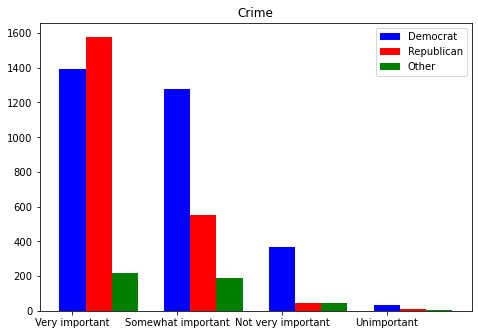

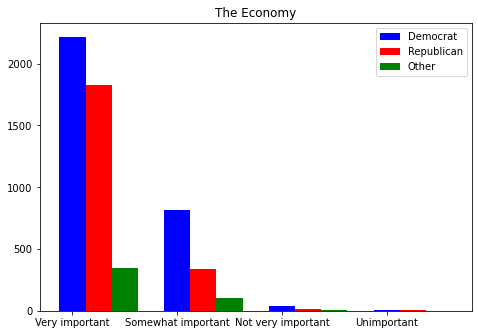

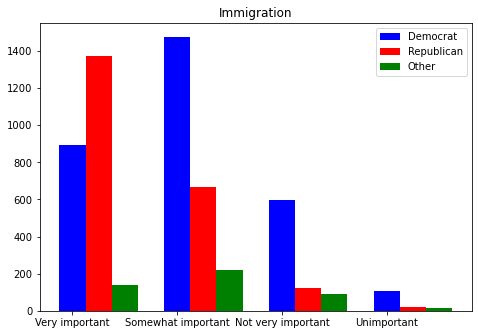

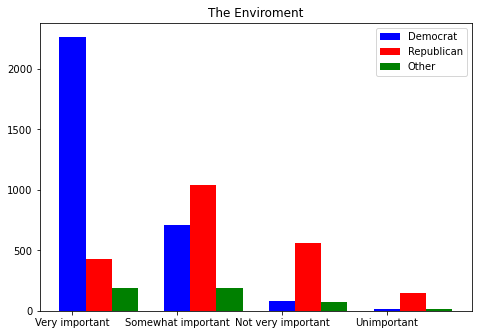

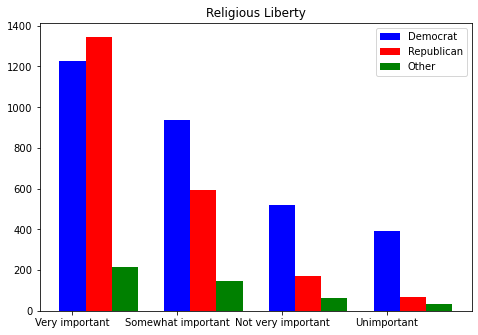

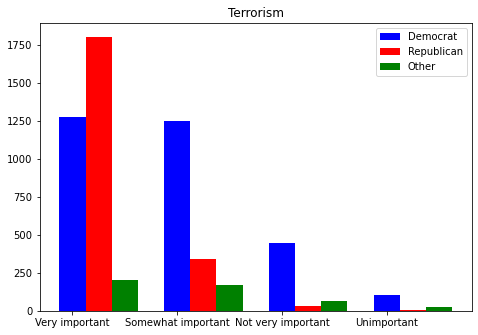

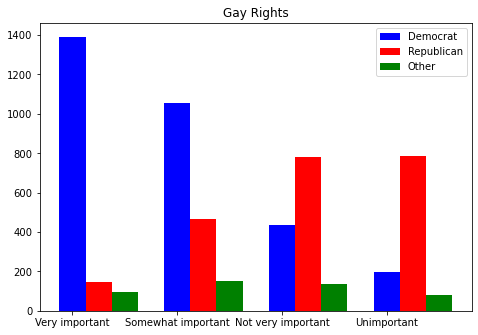

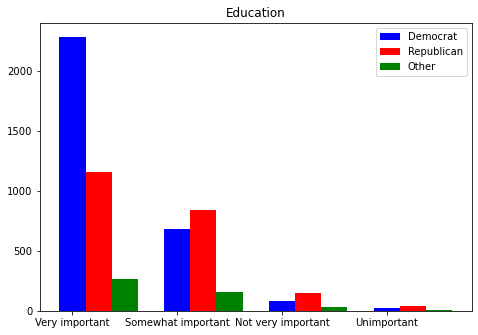

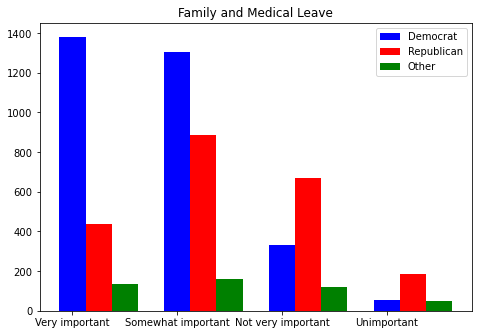

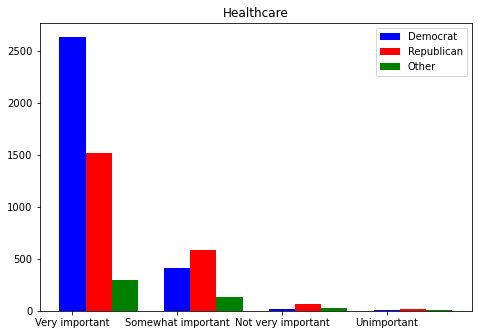

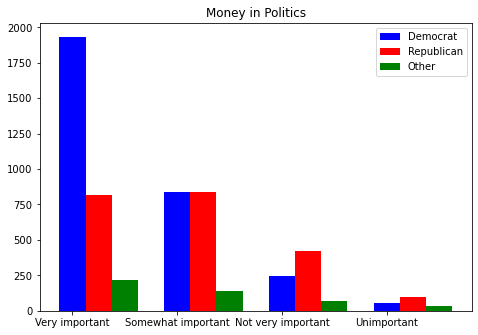

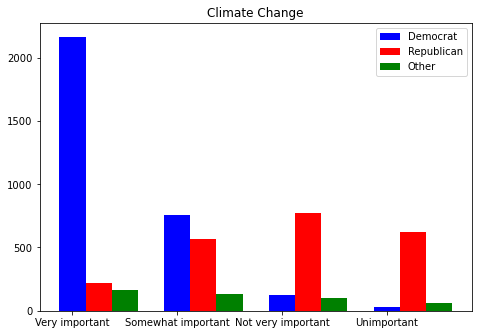

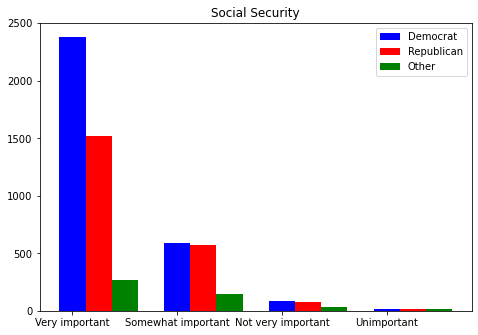

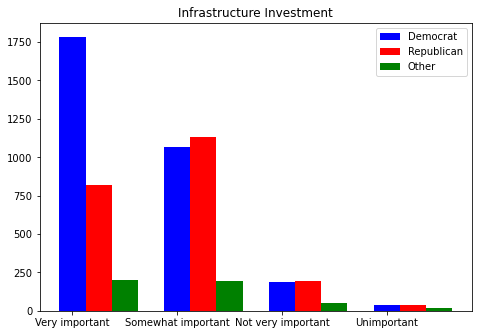

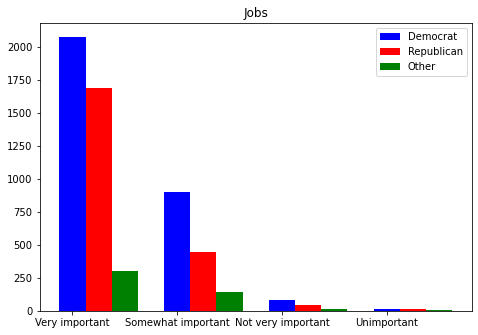

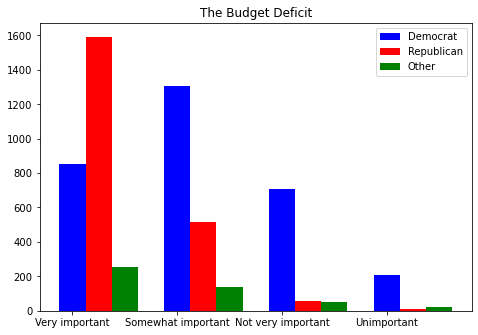

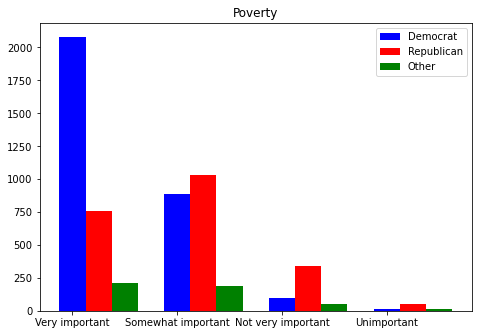

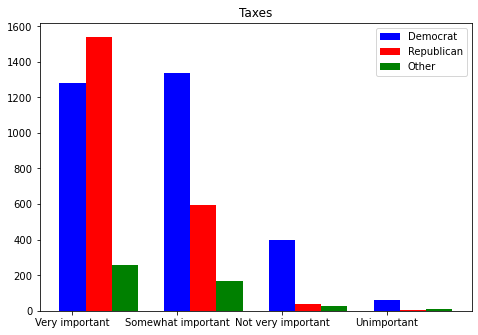

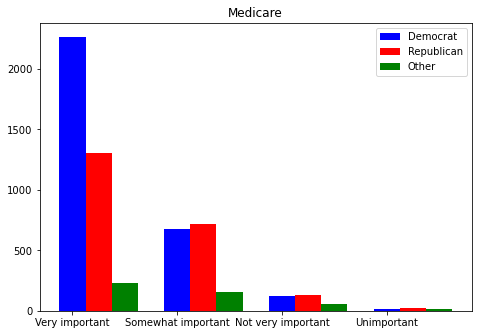

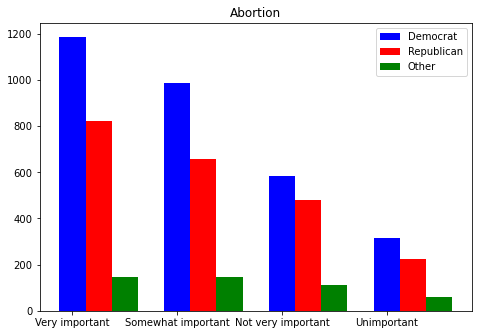

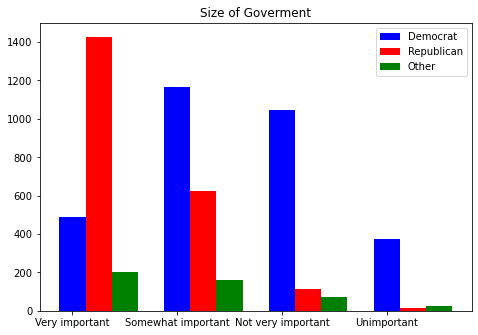

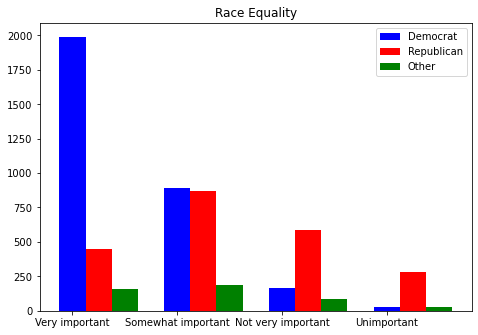

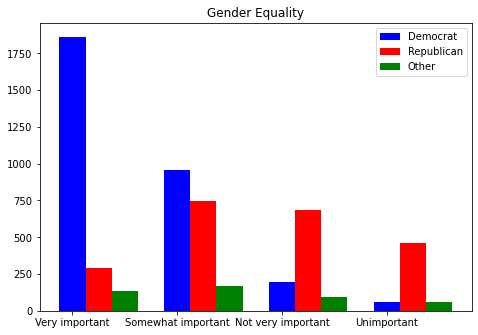

In [142]:
def dataRelabeled(data):
    
    columns = ['presvote16post_2016', 'imiss_a_2016', 'imiss_b_2016', 'imiss_c_2016', 'imiss_d_2016', 'imiss_e_2016', 'imiss_f_2016', 'imiss_g_2016', 'imiss_h_2016', 'imiss_i_2016', 'imiss_j_2016', 'imiss_k_2016', 'imiss_l_2016', 'imiss_m_2016', 'imiss_n_2016', 'imiss_o_2016','imiss_p_2016', 'imiss_q_2016','imiss_r_2016','imiss_s_2016', 'imiss_t_2016','imiss_u_2016','imiss_x_2016','imiss_y_2016', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    df = pd.DataFrame(data=data, columns=columns)
    
    df.dropna(axis=0, inplace=True) #This drops all nans 
    labels = df['presvote16post_2016']
    df = df.drop(['presvote16post_2016'], axis=1)
    #df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0])) #this fills with mode of column
    columns = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    #print(len(columns))
    #print(df.shape)
    #df_clean.columns = columns
    #print(df_clean.head())
    df.columns = columns
    #data_x = pd.get_dummies(df)
    label = transformLabels(labels)
    #print(df.head())
    return label, df

def sortCounts(counts):
    ret = [counts['Very important'], counts['Somewhat important'], counts['Not very important'], counts['Unimportant']]
    return ret

label, df2 = dataRelabeled(data)
columns = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality']
df2['label'] = label
df2.head()

df_dem = df2.loc[df2['label']==1]
df_rep = df2.loc[df2['label'] == 2]
df_other = df2.loc[df2['label'] == 0]

i = 1

for c in columns:
    
    counts_dem = df_dem.groupby([c]).size()
    counts_rep = df_rep.groupby([c]).size()
    counts_other = df_other.groupby([c]).size()
    counts_dem = sortCounts(counts_dem)
    counts_rep = sortCounts(counts_rep)
    counts_other = sortCounts(counts_other)
    num_cats = df2[c].nunique()
    #print(type(print(num_cats)))
    X = np.arange(num_cats)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, counts_dem, color = 'b', width = 0.25)
    ax.bar(X + 0.25, counts_rep, color = 'r', width = 0.25)
    ax.bar(X + 0.50, counts_other, color = 'g', width = 0.25)
    #print(type(X))
    categories = ['Very important', 'Somewhat important', 'Not very important', 'Unimportant']
    plt.xticks(X.tolist(), labels=categories)
    plt.title(c)
    ax.legend(labels=['Democrat','Republican','Other'])
    plt.show()